In [1]:
# 데이터 프레임화 및 시각화 준비 작업
import pymysql as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [2]:
# 각 컴퓨터로 읽을 때 고려해야할 사항
# 0. CSV 파일 읽을때 각자 데이터 위치 수정
# 1. 각자 MYSQL 비밀번호 작성해야함
# 2. MYSQL 상에 만든 / 1) database 이름 2)table 이름 수정

In [3]:
# SQL 연동
con = m.connect(host='localhost', user='root', password='7751', charset='utf8')
cur = con.cursor()

In [4]:
# 1) 데이터 기간내 국가별 방문자수(19.1~20.4)
df1 = pd.read_csv("PROJECT/01.nation_viitor.csv")
df1_sample = df1.drop(['Unnamed: 0'], axis=1)
df1_sample

,국가,방문자 수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


In [5]:
# 1-1) 국가별 방문자수 top5
df1_top5 = df1_sample.head()
df1_top5

,국가,방문자 수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159


In [6]:
df1_top5_reduced = df1_top5['방문자 수']
df1_top5_reduced = df1_top5_reduced//10000
df1_top5_reduced

0    623
1    369
2    142
3    117
4     78
Name: 방문자 수, dtype: int64

In [7]:
df1_top5_temp = df1_top5['국가']
df1_top5_temp

0        China
1        Japan
2       Taiwan
3          USA
4    Hong Kong
Name: 국가, dtype: object

In [8]:
df_re = pd.concat([df1_top5_temp, df1_top5_reduced], axis=1)
df_re

,국가,방문자 수
0,China,623
1,Japan,369
2,Taiwan,142
3,USA,117
4,Hong Kong,78


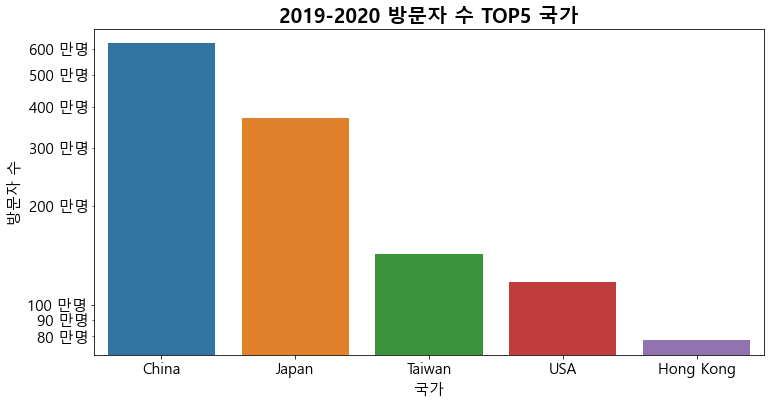

In [9]:
# 1-2) 시각화 // ?
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 15
plt.title('2019-2020 방문자 수 TOP5 국가',fontsize = 20 , fontweight = 'bold')
sns.barplot(x="국가", y="방문자 수", data=df_re, log = True)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.gca().yaxis.set_minor_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.show()

In [10]:
# 2) 방문자 수 상위 5개 국가가 차지하는 방문자 수 비율

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) / (SELECT SUM(방문자_수) FROM project_csv)*100 '나라별 비율'
FROM project_csv
WHERE 국가 IN ('china','Japan','Taiwan','USA','Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_visitorT5 = pd.DataFrame(res)
con.close()
df_visitorT5

col = ['국가', '방문자 수 비율']
df_visitorT5 = pd.DataFrame(res, columns =col)
df_visitorT5

,국가,방문자 수 비율
0,China,32.5144
1,Japan,19.2671
2,Taiwan,7.4274
3,USA,6.1036
4,Hong Kong,4.0830


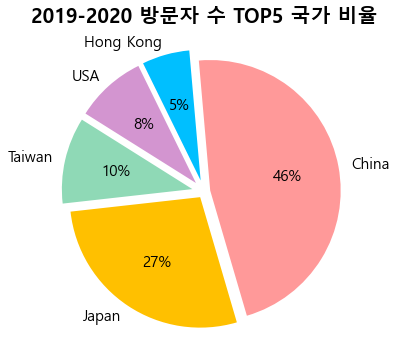

In [11]:
# 2-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
explode = [0.05, 0.05, 0.09, 0.09, 0.09]
top5_ratio = df_visitorT5.head(5)
data = top5_ratio['방문자 수 비율']
labels = top5_ratio['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 방문자 수 TOP5 국가 비율',  fontsize = 20 , fontweight = 'bold')
plt.show()

In [12]:
# 3) TOP 5 국가 방문 목적 비율
df2 = pd.read_csv("PROJECT/03.TOP5_nation_purpose_ratio.csv")
df2_sample = df2.drop(['Unnamed: 0'], axis=1)
df2_sample

,국가,관광,사업,공무,유학
0,Taiwan,98.2479,0.0810,0.0155,0.3974
1,Hong Kong,97.8488,0.0977,0.0066,0.4196
2,Japan,97.0299,0.7629,0.0613,0.4420
3,China,80.5216,0.7170,0.0790,4.3149
4,USA,75.6001,0.4654,3.5476,0.5463


<Figure size 1152x432 with 0 Axes>

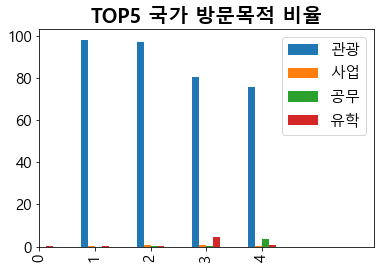

In [13]:
# 3-1) 시각화
plt.figure(figsize=(16, 6))
plt.rcParams['font.size'] = 15

df2_sample.plot.bar()
plt.xlim(0,6)
plt.title('TOP5 국가 방문목적 비율',fontsize = 20 , fontweight = 'bold')
plt.show()

In [14]:
# 관광 비중이 높아 방문 목적별 TOP5 국가를 선정함

In [15]:
# 4) 관광 목적 TOP 5 / 1. 중국 2. 일본 3. 대만 4. 미국 5. 홍콩

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(관광)/(SELECT SUM(관광) FROM project_csv)*100 관광비율
FROM project_csv
WHERE 국가 IN ('China', 'Japan', 'Taiwan', 'USA', 'Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_purT5 = pd.DataFrame(res)
con.close()

col = ['국가', '관광 비율']
df_purT5 = pd.DataFrame(res, columns =col)
df_purT5

# 'others' 생성 코드

sum_of_etc = 100.0-float(df_purT5["관광 비율"].sum())              
sum_of_etc
data ={"국가": "Others", "관광 비율":sum_of_etc}
df_purT5 = df_purT5.append(data,  ignore_index=True)
df_purT5

,국가,관광 비율
0,China,32.0197
1,Japan,22.8640
2,Taiwan,8.9246
3,USA,5.6434
4,Hong Kong,4.8862
5,Others,25.6621


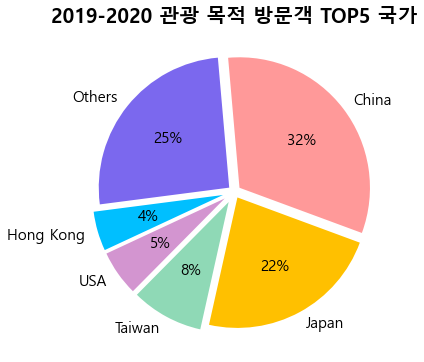

In [16]:
# 4-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
explode = [0.05, 0.05, 0.09, 0.09, 0.09, 0.05]
data = df_purT5['관광 비율']
labels = df_purT5['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 관광 목적 방문객 TOP5 국가',  fontsize = 20 , fontweight = 'bold')
plt.show()

In [17]:
# 5) 사업 목적 TOP 5 / 1. 중국 2. 인도 3. 일본 4. 베트남 5. 아프리카 대륙
df3 = pd.read_csv("PROJECT/05.business_TOP5.csv")
df3_sample = df3.drop(['Unnamed: 0'], axis=1)
df3_sample

# 'others' 생성 코드
sum_etc = 100.0-float(df3_sample["사업 비율"].sum())
sum_etc
df3['사업 비율'].sum()
data ={"국가": "Others", "사업 비율":sum_etc}
df3_a = df3_sample.append(data,  ignore_index=True)
df3_a

,국가,사업 비율
0,China,22.6964
1,India,19.0170
2,Japan,14.3104
3,Vietnam,7.2481
4,Africa others,5.3726
5,Others,31.3555


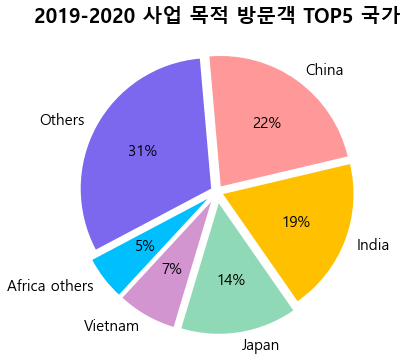

In [18]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
plt.title('2019-2020 사업 목적 방문객 TOP5 국가',  fontsize = 20 , fontweight = 'bold')
labels = df3_a['국가']
data = df3_a['사업 비율']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.show()

In [19]:
# 6) 공무 목적 TOP 5 / 1. 미국 2. 중국 3. 몽골 4. 베트남 5. 태국 

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(공무)/(SELECT SUM(공무) FROM project_csv)*100 공무비율
FROM project_csv
WHERE 국가 IN ('USA', 'China', 'Vietnam', 'Mongolia', 'Thailand')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_officeT5 = pd.DataFrame(res)
con.close()

col = ['국가', '공무 비율']
df_officeT5 = pd.DataFrame(res, columns =col)
df_officeT5

# 'others' 생성 코드
sum_of_etc = 100.0-float(df_officeT5["공무 비율"].sum())              
sum_of_etc

data ={"국가": "Others", "공무 비율":sum_of_etc}

df_officeT5 = df_officeT5.append(data,  ignore_index=True)
df_officeT5

,국가,공무 비율
0,USA,49.2453
1,China,5.8443
2,Mongolia,5.2467
3,Vietnam,5.1957
4,Thailand,4.9669
5,Others,29.5011


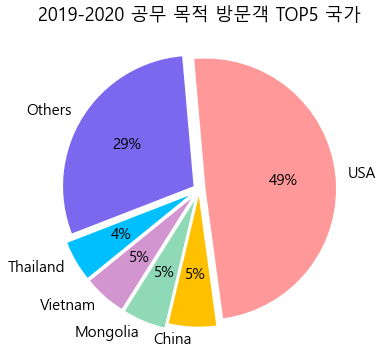

In [20]:
# 6-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
data = df_officeT5['공무 비율']
labels = df_officeT5['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 공무 목적 방문객 TOP5 국가')
plt.show()

In [21]:
# 7) 유학 목적 TOP 5 / 1. 중국 2. 베트남 3. 일본 4. 몽골 5.우즈벡 

df4 = pd.read_csv("PROJECT/07.studying_overseas_TOP5.csv")

df4_sample = df4.drop(['Unnamed: 0'], axis=1)
df4_sample

sum_etc = 100.0-float(df4_sample["유학 비율"].sum())
sum_etc

data = {"국가" : "Others", "유학 비율" : sum_etc}
df4_a = df4_sample.append(data, ignore_index=True)
df4_a

,국가,유학 비율
0,China,59.6831
1,Vietnam,14.4862
2,Japan,3.6224
3,Mongolia,2.3685
4,Uzbekistan,1.9759
5,Others,17.8639


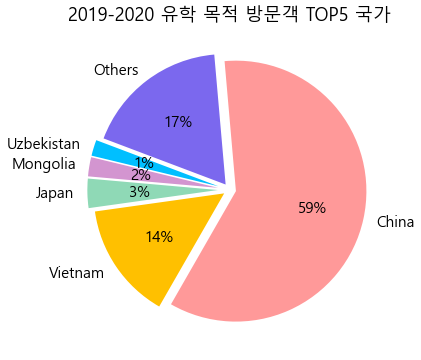

In [22]:
# 7-1) 시각화 

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
labels = df4_a['국가']
data = df4_a['유학 비율']
explode = [0.05, 0.05, 0.09, 0.09, 0.09, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 유학 목적 방문객 TOP5 국가')
plt.show()

In [23]:
# 8) 2017-2019 3년간 방문국가별 1인당 평균 지출 비용
con = m.connect(host='localhost', user='root', password='7751', db = 'visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure2
WHERE class_1 = '거주국'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['국가', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,국가,1인 평균 지출비용
0,GCC,2558000
1,중동전체,2266000
2,중국,2016000
3,몽골,1842000
4,중앙아시아,1581000
5,인도,1514000
6,싱가포르,1500000
7,러시아,1479000
8,기타중동,1429000
9,기타,1316000


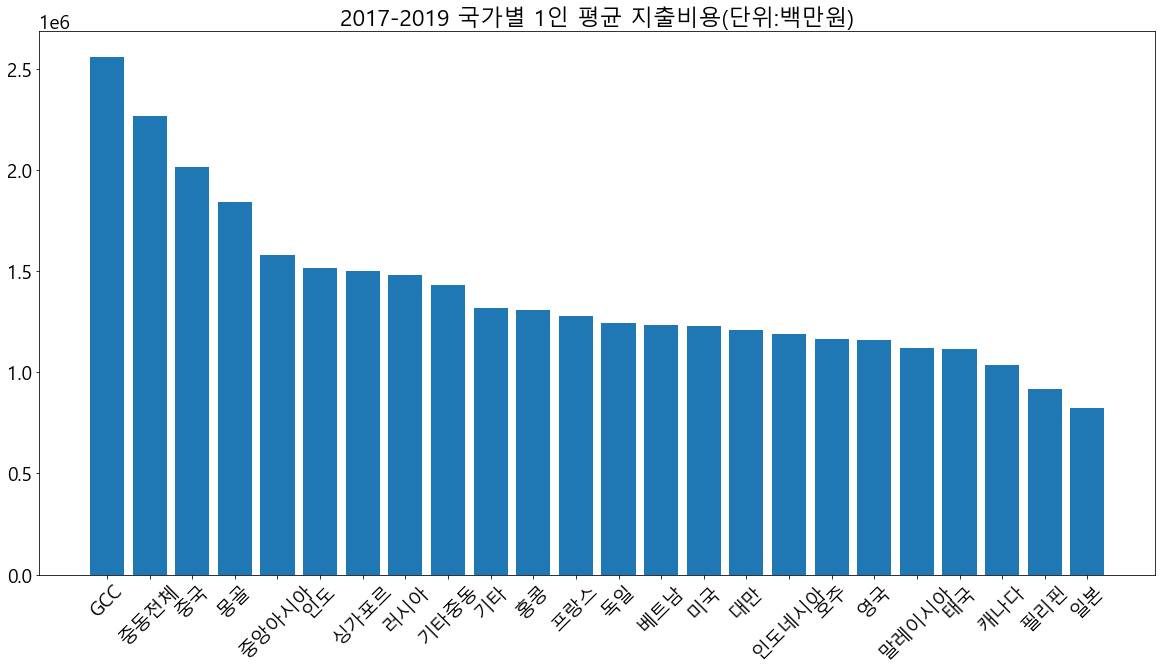

In [82]:
# 8-1) 시각화
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 19
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['국가']
data = df_avg_expenditure['1인 평균 지출비용']
plt.xticks(rotation=45)
plt.bar(index,data)
plt.title('2017-2019 국가별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [85]:
# 9) 연령대별 1인 평균 지출비용
con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure2
WHERE class_1 = '연령'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['연령', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,연령,1인 평균 지출비용
0,31~40세,1628000
1,21~30세,1590000
2,15~20세,1410000
3,41~50세,1348000
4,모름/무응답,1307000
5,51~60세,1212000
6,61세 이상,1172000


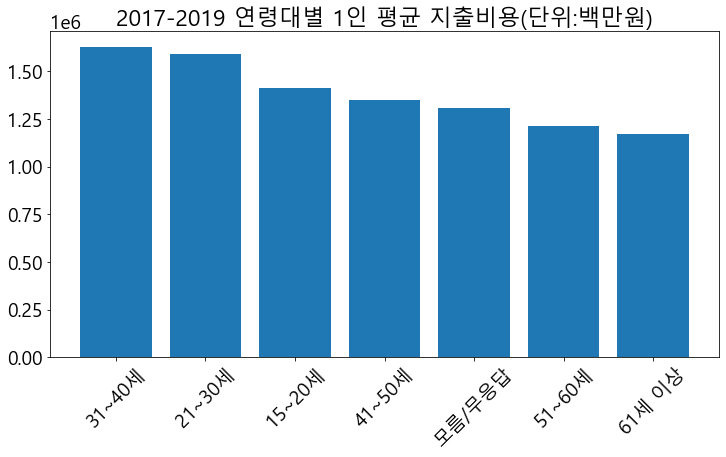

In [87]:
# 9-1) 시각화

avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['연령']
data = df_avg_expenditure['1인 평균 지출비용']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 연령대별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [92]:
# 10) 성별별 1인 평균 지출비용

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure2
WHERE class_1 = '성별'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['성별', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure


,성별,1인 평균 지출비용
0,여성,1575000
1,남성,1403000


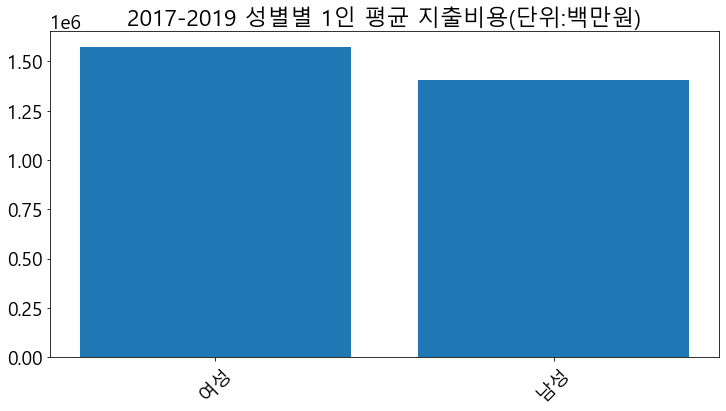

In [93]:
# 10-1) 시각화
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['성별']
data = df_avg_expenditure['1인 평균 지출비용']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 성별별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [25]:
# 11) 코로나 발생 전/후 전년 동월 한국 방문객 수 비교(1월~4월)

In [26]:
con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 년_월, SUM(방문자_수)/10000 총_방문자_수
FROM project_csv
WHERE 년_월 IN ('19-01', '19-02', '19-03', '19-04', '20-01', '20-02', '20-03', '20-04')
GROUP BY 1;
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_VisitbyYear = pd.DataFrame(res)
con.close()
df_VisitbyYear

col = ['년_월', '총_방문자_수']
df_VisitbyYear = pd.DataFrame(res, columns =col)
df_VisitbyYear

,년_월,총_방문자_수
0,19-01,71.1989
1,19-02,120.1802
2,19-03,153.5641
3,19-04,163.5066
4,20-01,127.2708
5,20-02,68.5212
6,20-03,8.3497
7,20-04,2.9415


0     71.1989
1    120.1802
2    153.5641
3    163.5066
Name: 총_방문자_수, dtype: object 4    127.2708
5     68.5212
6      8.3497
7      2.9415
Name: 총_방문자_수, dtype: object


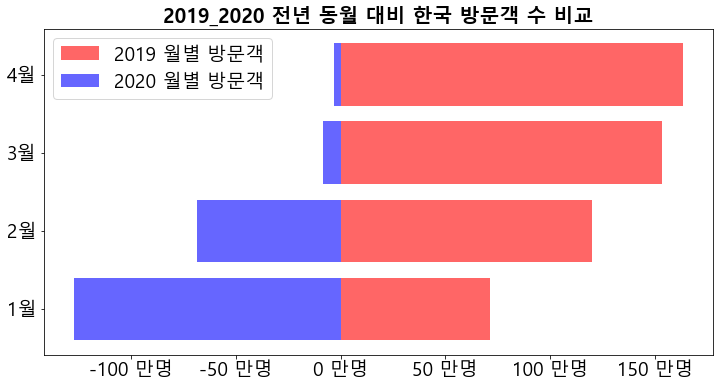

In [96]:
# 11-1) 시각화
visit_2019 = df_VisitbyYear['총_방문자_수'].head(4)
visit_2020 = df_VisitbyYear["총_방문자_수"].tail(4)
index = ['1월', '2월', '3월', '4월']
print(visit_2019,visit_2020)
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.barh(index, visit_2019, color = 'r', alpha = 0.6, label='2019 월별 방문객')
plt.barh(index, -(visit_2020), color = 'b', alpha = 0.6, label='2020 월별 방문객')
plt.title('2019_2020 전년 동월 대비 한국 방문객 수 비교', fontsize = 20, fontweight = 'bold')
plt.legend(loc=2, ncol=1)
plt.show()

In [28]:
# 12) 국가별 방문 추세 

In [123]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """select 년_월, 국가, 방문자_수/10000 
from project_csv 
where 국가 = 'China'
order by 1;"""
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_ch = pd.DataFrame(res, columns = col)
con.close()
df_ch

,년_월,국가,방문자_수
0,19-01,China,39.2814
1,19-02,China,45.3379
2,19-03,China,48.7623
3,19-04,China,49.3250
4,19-05,China,50.0413
5,19-06,China,47.5007
6,19-07,China,51.9132
7,19-08,China,57.8112
8,19-09,China,54.1350
9,19-10,China,56.7695


In [102]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Japan';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_jp = pd.DataFrame(res, columns = col)
con.close()
df_jp

,년_월,국가,방문자_수
0,19-01,Japan,206526
1,19-02,Japan,213200
2,19-03,Japan,375119
3,19-04,Japan,290092
4,19-05,Japan,286273
5,19-06,Japan,282476
6,19-07,Japan,274830
7,19-08,Japan,329652
8,19-09,Japan,251119
9,19-10,Japan,248541


In [105]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Taiwan';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_Tai = pd.DataFrame(res, columns = col)
con.close()
df_Tai

,년_월,국가,방문자_수
0,19-01,Taiwan,87954
1,19-02,Taiwan,94559
2,19-03,Taiwan,98510
3,19-04,Taiwan,113072
4,19-05,Taiwan,101779
5,19-06,Taiwan,118437
6,19-07,Taiwan,113587
7,19-08,Taiwan,109273
8,19-09,Taiwan,102758
9,19-10,Taiwan,127944


In [107]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='USA';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_USA = pd.DataFrame(res, columns = col)
con.close()
df_USA

,년_월,국가,방문자_수
0,19-01,USA,62737
1,19-02,USA,57732
2,19-03,USA,84275
3,19-04,USA,102524
4,19-05,USA,95815
5,19-06,USA,105398
6,19-07,USA,97428
7,19-08,USA,86586
8,19-09,USA,90819
9,19-10,USA,101099


In [109]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Hong Kong';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_HK = pd.DataFrame(res, columns = col)
con.close()
df_HK

,년_월,국가,방문자_수
0,19-01,Hong Kong,35896
1,19-02,Hong Kong,51312
2,19-03,Hong Kong,46068
3,19-04,Hong Kong,76104
4,19-05,Hong Kong,57026
5,19-06,Hong Kong,61728
6,19-07,Hong Kong,59036
7,19-08,Hong Kong,65958
8,19-09,Hong Kong,45911
9,19-10,Hong Kong,65544


In [111]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Thailand';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_Thai = pd.DataFrame(res, columns = col)
con.close()
df_Thai

,년_월,국가,방문자_수
0,19-01,Thailand,41334
1,19-02,Thailand,39220
2,19-03,Thailand,53100
3,19-04,Thailand,69726
4,19-05,Thailand,52660
5,19-06,Thailand,37684
6,19-07,Thailand,37278
7,19-08,Thailand,32830
8,19-09,Thailand,36052
9,19-10,Thailand,65878


In [113]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Phillipines';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_philli = pd.DataFrame(res, columns = col)
con.close()
df_philli

,년_월,국가,방문자_수
0,19-01,Phillipines,30473
1,19-02,Phillipines,29294
2,19-03,Phillipines,38701
3,19-04,Phillipines,66525
4,19-05,Phillipines,50569
5,19-06,Phillipines,40748
6,19-07,Phillipines,29074
7,19-08,Phillipines,41817
8,19-09,Phillipines,36252
9,19-10,Phillipines,55394


In [115]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Vietnam';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_Viet = pd.DataFrame(res, columns = col)
con.close()
df_Viet

,년_월,국가,방문자_수
0,19-01,Vietnam,20183
1,19-02,Vietnam,42181
2,19-03,Vietnam,46991
3,19-04,Vietnam,63169
4,19-05,Vietnam,44416
5,19-06,Vietnam,58339
6,19-07,Vietnam,52521
7,19-08,Vietnam,43583
8,19-09,Vietnam,43617
9,19-10,Vietnam,64820


In [117]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Malaysia';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_Mal = pd.DataFrame(res, columns = col)
con.close()
df_Mal

,년_월,국가,방문자_수
0,19-01,Malaysia,22065
1,19-02,Malaysia,27484
2,19-03,Malaysia,40789
3,19-04,Malaysia,43726
4,19-05,Malaysia,31217
5,19-06,Malaysia,25538
6,19-07,Malaysia,16831
7,19-08,Malaysia,20520
8,19-09,Malaysia,28020
9,19-10,Malaysia,45354


In [118]:
con = m.connect(host='localhost', user='root', passwd='7751', db='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = "select 년_월, 국가, 방문자_수/10000 from project_csv where 국가='Singapore';"
cur.execute(q)
res = cur.fetchall()
col = ["년_월", "국가", "방문자_수"]
df_Sp = pd.DataFrame(res, columns = col)
con.close()
df_Sp

,년_월,국가,방문자_수
0,19-01,Singapore,9855
1,19-02,Singapore,9792
2,19-03,Singapore,22105
3,19-04,Singapore,23307
4,19-05,Singapore,20114
5,19-06,Singapore,24743
6,19-07,Singapore,10992
7,19-08,Singapore,13008
8,19-09,Singapore,17745
9,19-10,Singapore,24719


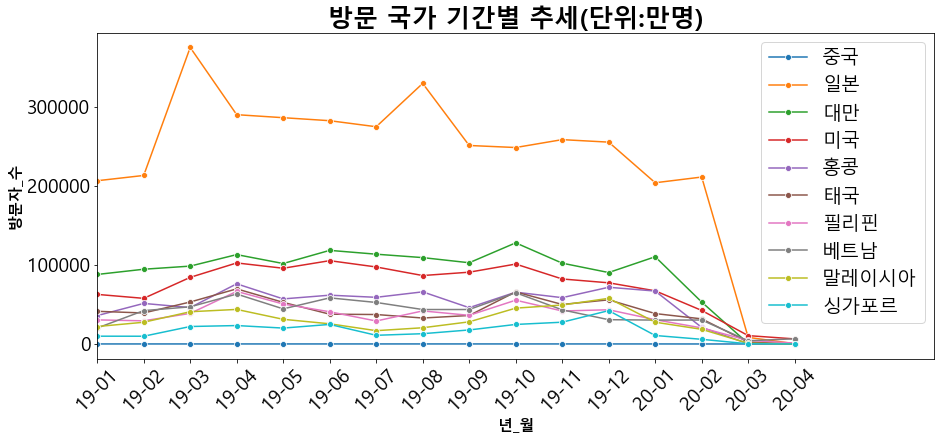

In [124]:
# 12-1) 국가별 방문 추세 시각화

plt.figure(figsize=(15,6))

sns.lineplot(x='년_월', y='방문자_수', data=df_ch, marker='o', label = '중국')
sns.lineplot(x='년_월', y='방문자_수', data=df_jp, marker='o', label = '일본')
sns.lineplot(x='년_월', y='방문자_수', data=df_Tai, marker='o', label = '대만')
sns.lineplot(x='년_월', y='방문자_수', data=df_USA, marker='o', label = '미국')
sns.lineplot(x='년_월', y='방문자_수', data=df_HK, marker='o', label = '홍콩')
sns.lineplot(x='년_월', y='방문자_수', data=df_Thai, marker='o', label = '태국')
sns.lineplot(x='년_월', y='방문자_수', data=df_philli, marker='o', label = '필리핀')
sns.lineplot(x='년_월', y='방문자_수', data=df_Viet, marker='o', label = '베트남')
sns.lineplot(x='년_월', y='방문자_수', data=df_Mal, marker='o', label = '말레이시아')
sns.lineplot(x='년_월', y='방문자_수', data=df_Sp, marker='o', label = '싱가포르')


# 제목 추가하기
plt.title("방문 국가 기간별 추세(단위:만명)", family = "Malgun Gothic", color = 'black', weight = 'bold', size = 25)

# x축 라벨추가하기
plt.xlabel('년_월', color = 'black', weight = 'bold', size = 15)
plt.xticks(rotation=45)
# y축 라벨추가하기
plt.ylabel('방문자_수', color = 'black', weight = 'bold', size = 15)
plt.xlim(0,18)

plt.legend()
plt.show()